# Entropía cruzada

In [1]:
import numpy as np

Dadas dos distribuciones de probabilidad, la entropía cruzada mide el grado de similitud entre las distribuciones

Se basa en KL-divergence $D_{KL}(p||q)$ (Kullback-Leibler)

$\huge H(p,q) = - \sum_{i=1}^N{p_i log(q_i)} = H(p) + D_{KL}(p||q)$

$\large D_{KL}(p||q) = \sum_{i}{p_i log(p_i/q_i)}$

La divergencia KL es cero cuando las dos distribuciones son iguales.

Cual es el valor de la entropía cruzada mínimo?

In [35]:
def cross_entropy(P, Q):
    """
    Calcula la entropía curzada entre de dos distribuciones
    """
    ce = 0
    for i, p in P.items():
        ce = ce - p*np.log(Q[i])
    return ce/np.log(len(P))

In [36]:
cross_entropy(X, X)

0.969570350190125

In [37]:
X

{1: 0.2, 2: 0.1, 3: 0.2, 4: 0.1, 5: 0.1, 6: 0.1, 7: 0.2}

# Dada una V.A X

In [95]:
X = {1: 0.175, 2: 0.1, 3: 0.25, 4:0.05, 5:0.125, 6: 0.1, 7:0.2}

In [96]:
sum(X.values())

1.0

In [97]:
from matplotlib import pyplot as plt

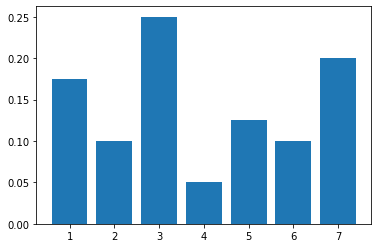

In [98]:
plt.bar(X.keys(), X.values())
plt.show()

In [99]:
def estimate_and_get_ce(X, N):
    """
        Dado una distribución X y la cantidad de veces N que se realiza el muestreo de la distribución, 
        devuelve la entropía cruzada entre X y la estimación de X
    """
    # Muestramos la V.A X, N veces
    observaciones = np.random.choice(list(X.keys()), size = N, p = list(X.values()))
    # Calculamos histograma
    ps, _ = np.histogram(observaciones, bins=len(X), range=[1,len(X)+1])
    # Normalizamos
    ps = ps/len(observaciones)
    X_ = {k:ps[i] for i,k in enumerate(X.keys())}
    return cross_entropy(X, X_)

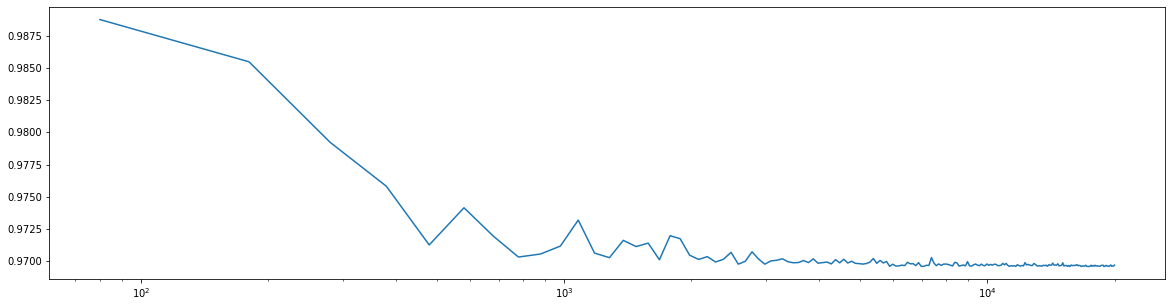

In [102]:
plt.figure(figsize=(20,5))
plt.plot(Ns, entropies)
plt.xscale('log')

In [103]:
X

{1: 0.175, 2: 0.1, 3: 0.25, 4: 0.05, 5: 0.125, 6: 0.1, 7: 0.2}

In [104]:
cross_entropy(X, X)

0.9474818901754604

### Intuición de la entropía Cruzada:

https://www.quora.com/Whats-an-intuitive-way-to-think-of-cross-entropy